In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [4]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

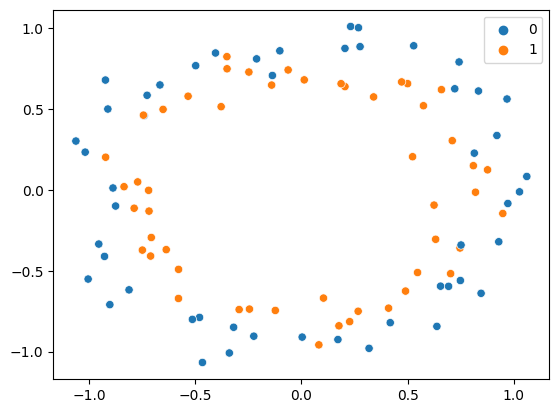

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, verbose=0)

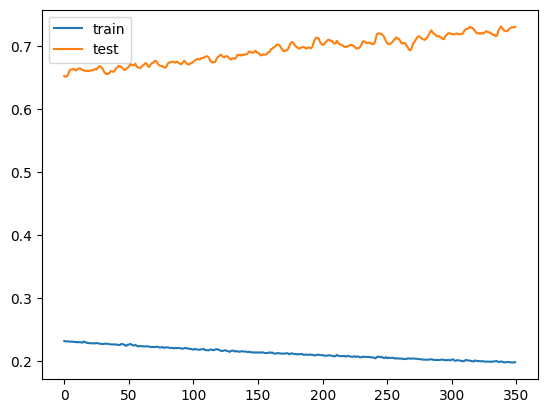

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 17s 2ms/step


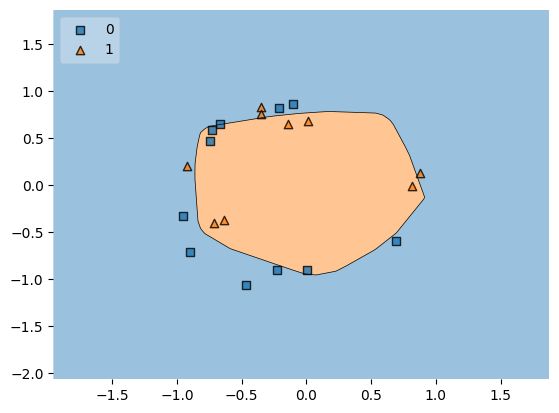

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

## Implementing Early Stopping

In [20]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, callbacks=callback)

Epoch 1/350
3/3 [==============================] - 1s 115ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.7024 - val_accuracy: 0.3500
Epoch 2/350
3/3 [==============================] - 0s 21ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.7041 - val_accuracy: 0.4500
Epoch 3/350
3/3 [==============================] - 0s 31ms/step - loss: 0.6904 - accuracy: 0.5375 - val_loss: 0.7073 - val_accuracy: 0.4500
Epoch 4/350
3/3 [==============================] - 0s 26ms/step - loss: 0.6890 - accuracy: 0.5375 - val_loss: 0.7084 - val_accuracy: 0.4500
Epoch 5/350
3/3 [==============================] - 0s 32ms/step - loss: 0.6880 - accuracy: 0.5500 - val_loss: 0.7094 - val_accuracy: 0.4500
Epoch 6/350
3/3 [==============================] - 0s 22ms/step - loss: 0.6871 - accuracy: 0.5625 - val_loss: 0.7103 - val_accuracy: 0.4000
Epoch 7/350
3/3 [==============================] - 0s 30ms/step - loss: 0.6863 - accuracy: 0.5625 - val_loss: 0.7113 - val_accuracy: 0.4000
Epoch 8/350
3/3 [==

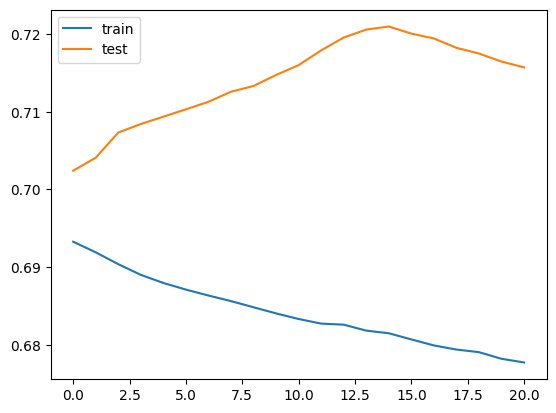

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 16s 2ms/step


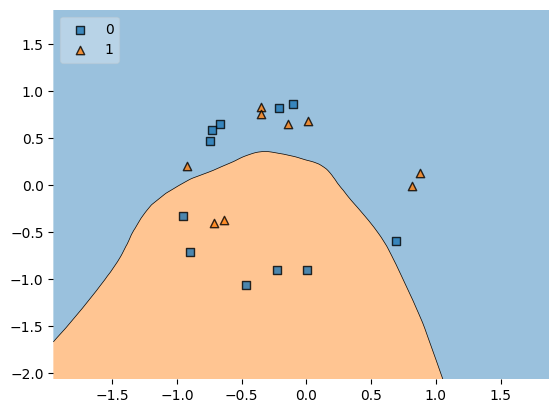

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()